### Plots for K-Means Process

Author:  David Yerrington (SF)

Undoubtably someone will find this interesting.  Rather than cluttering the main notebook for this lecture, I've chosen to break this out into it's own notebook.

In [1]:
### Scratch space for building k-means step by step example
from sklearn.datasets import make_blobs
import matplotlib.pylab as plt
import pandas as pd, numpy as np

%matplotlib inline

figsize=(8, 6)

colors = ["r", "b", "g"]
columns = ["x1", "x2", "color"]

X, color = make_blobs(n_samples=50, random_state=42, centers=3, cluster_std=1.75)
X = map(lambda x: (x[0][0], x[0][1], colors[x[1]]), zip(X, color))


# Starting centroid points
centroids = pd.DataFrame([(-8, 0, "g"), (-7.5, 8, "r"), (2.5, -2, "b")], columns=columns)

# Training points
gaus_df = pd.DataFrame(list(X), columns=columns)

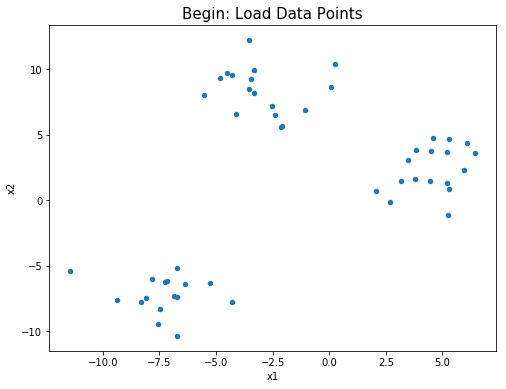

In [2]:
ax = gaus_df.plot(kind="scatter", x="x1", y="x2", figsize=figsize)
ax.set_title("Begin: Load Data Points", fontsize=15)

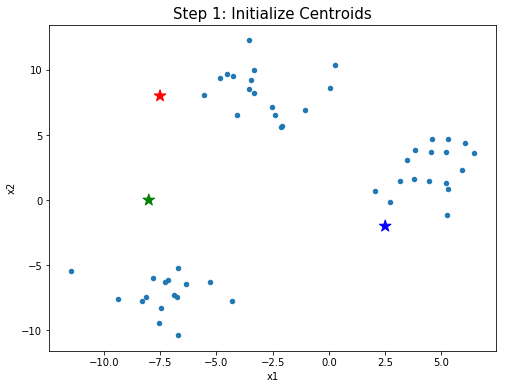

In [3]:
ax = centroids.plot(kind="scatter", x=0, y=1, c=centroids['color'], marker="*", s=150)
ax = gaus_df.plot(kind="scatter", x="x1", y="x2", ax=ax, figsize=figsize)
ax.set_title("Step 1: Initialize Centroids", fontsize=15)


# gaus_df


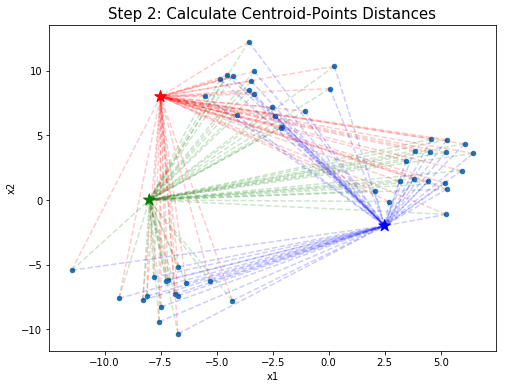

In [4]:
# Distance lines
def draw_lines(centroid):
    # plot to each group
    
    for point in gaus_df.to_records():

        plt.plot(
            (point['x1'], centroid['x1']), 
            (point['x2'], centroid['x2']),
            alpha = .2,
            color = centroid['color'],
            linestyle = "--"
            
        )

# Starting points
ax = centroids.plot(kind="scatter", x=0, y=1, c=centroids['color'], marker="*", s=150, figsize=figsize)

centroids.apply(draw_lines, axis=1)


# Training points
ax = gaus_df.plot(kind="scatter", x="x1", y="x2", ax=ax)
ax.set_title("Step 2: Calculate Centroid-Points Distances", fontsize=15)


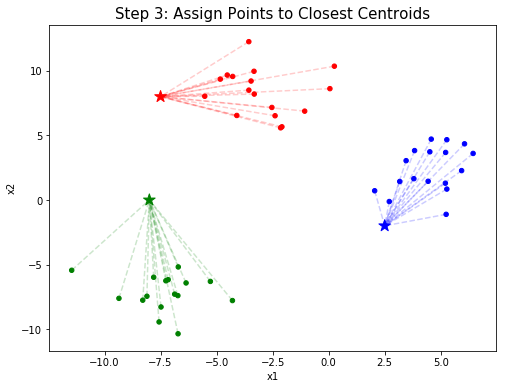

In [5]:
# Distance lines
def draw_lines(centroid):
    
    # plot to each group
    for point in gaus_df.to_records():

        if point['color'] != centroid['color']: continue
        
        plt.plot(
            (point['x1'], centroid['x1']), 
            (point['x2'], centroid['x2']),
            alpha = .2,
            color = centroid['color'],
            linestyle = "--"
        )

# Starting points
ax = centroids.plot(kind="scatter", x=0, y=1, c=centroids['color'], marker="*", s=150)

centroids.apply(draw_lines, axis=1)


# Training points
ax = gaus_df.plot(kind="scatter", x="x1", y="x2", c=gaus_df['color'], ax=ax,  figsize=figsize)
ax.set_title("Step 3: Assign Points to Closest Centroids", fontsize=15)

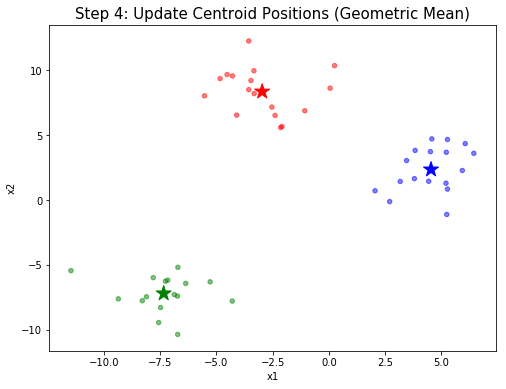

In [6]:
# Distance lines


# Starting points
# ax = centroids.plot(kind="scatter", x=0, y=1, c=centroids['color'], marker="*", s=150)

## New centroid points
mean_centroids = gaus_df.groupby("color").mean()
ax = mean_centroids.plot(kind="scatter", x="x1", y="x2", c=mean_centroids.index, marker="*", s=250)

# Training points
ax = gaus_df.plot(kind="scatter", x="x1", y="x2", alpha=.5, c=gaus_df['color'], ax=ax,  figsize=figsize)
ax.set_title("Step 4: Update Centroid Positions (Geometric Mean)", size=15)

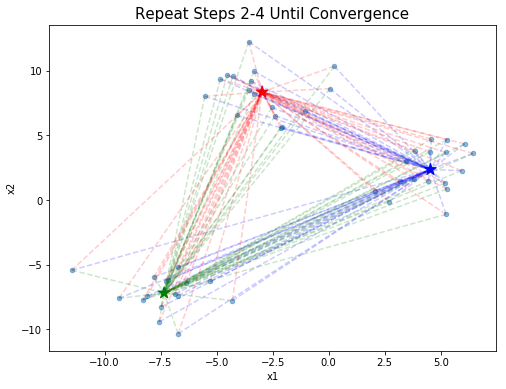

In [7]:
# Distance lines
def draw_lines(centroid):
    # plot to each group
    
    for point in gaus_df.to_records():

        plt.plot(
            (point['x1'], centroid['x1']), 
            (point['x2'], centroid['x2']),
            alpha = .2,
            color = centroid['color'],
            linestyle = "--"
        )

# Starting points
mean_centroids_flat = mean_centroids.reset_index()
ax = mean_centroids_flat.plot(kind="scatter", x="x1", y="x2", c=mean_centroids_flat['color'], marker="*", s=150)

mean_centroids.reset_index().apply(draw_lines, axis=1)

# Training points
ax = gaus_df.plot(kind="scatter", x="x1", y="x2", ax=ax, alpha=.5,  figsize=figsize)
ax.set_title("Repeat Steps 2-4 Until Convergence", fontsize=15)

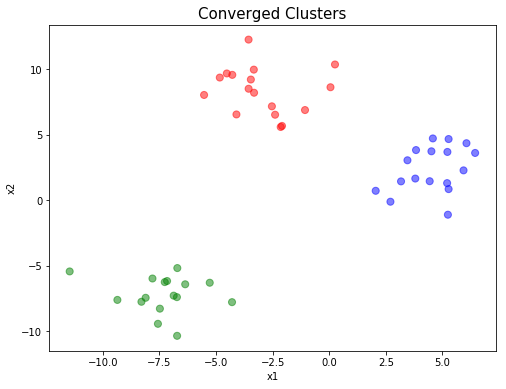

In [8]:
ax = gaus_df.plot(kind="scatter", x="x1", y="x2", alpha=.5, figsize=figsize, c=gaus_df['color'], s=50)
ax.set_title("Converged Clusters", fontsize=15)